## Project: Credit Card Fraud Detection
#### This is a binary classification project.
#### Performance metrics: higher precision and recall values, lower false negatives and false positives

#### Dataset and details of problem are available at https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [2]:
# Read the data
df = pd.read_csv("data/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Perform some basic feature selection

In [4]:
sum(df.isna().sum())

0

No missing values

Look for correlated features with Class

In [5]:
corr = df.corr()

In [6]:
corr.style.background_gradient(cmap='coolwarm')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117396,-0.010593,-0.419618,-0.105260,0.173072,-0.063016,0.084714,-0.036949,-0.008660,0.030617,-0.247689,0.124348,-0.065902,-0.098757,-0.183453,0.011903,-0.073297,0.090438,0.028975,-0.050866,0.044736,0.144059,0.051142,-0.016182,-0.233083,-0.041407,-0.005135,-0.009413,-0.010596,-0.012323
V1,0.117396,1.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.227709,-0.101347
V2,-0.010593,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.531409,0.091289
V3,-0.419618,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.210880,-0.192961
V4,-0.105260,-0.000000,-0.000000,0.000000,1.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.098732,0.133447
V5,0.173072,0.000000,0.000000,-0.000000,-0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.386356,-0.094974
V6,-0.063016,-0.000000,0.000000,0.000000,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.215981,-0.043643
V7,0.084714,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.397311,-0.187257
V8,-0.036949,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.103079,0.019875
V9,-0.008660,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.044246,-0.097733


In [7]:
columns_to_keep = list(corr["Class"][(corr["Class"]>=0.2) | (corr["Class"]<=-0.2)].index)
columns_to_keep

['V10', 'V12', 'V14', 'V17', 'Class']

In [8]:
df.drop(df.columns.difference(columns_to_keep), axis=1)

,V10,V12,V14,V17,Class
0,0.090794,-0.617801,-0.311169,0.207971,0
1,-0.166974,1.065235,-0.143772,-0.114805,0
2,0.207643,0.066084,-0.165946,1.109969,0
3,-0.054952,0.178228,-0.287924,-0.684093,0
4,0.753074,0.538196,-1.119670,-0.237033,0
...,...,...,...,...,...
284802,4.356170,2.711941,4.626942,1.991691,0
284803,-0.975926,0.915802,-0.675143,-0.025693,0
284804,-0.484782,0.063119,-0.510602,0.313502,0
284805,-0.399126,-0.962886,0.449624,0.509928,0


In [9]:
# Drop columns other than those to keep
df.drop(df.columns.difference(columns_to_keep), axis=1, inplace= True)

In [10]:
# Target feature is Class 0: valid, 1: fraud transaction
X = df.drop("Class", axis=1)
y = df["Class"]

In [11]:
X

,V10,V12,V14,V17
0,0.090794,-0.617801,-0.311169,0.207971
1,-0.166974,1.065235,-0.143772,-0.114805
2,0.207643,0.066084,-0.165946,1.109969
3,-0.054952,0.178228,-0.287924,-0.684093
4,0.753074,0.538196,-1.119670,-0.237033
...,...,...,...,...
284802,4.356170,2.711941,4.626942,1.991691
284803,-0.975926,0.915802,-0.675143,-0.025693
284804,-0.484782,0.063119,-0.510602,0.313502
284805,-0.399126,-0.962886,0.449624,0.509928


In [12]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

Check for class balance

In [13]:
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [14]:
print("% of fraud transactions in dataset:",sum(y==1)*100/y.count())

% of fraud transactions in dataset: 0.1727485630620034


#### Observation: The dataset is highly imbalanced with more valid transactions and fewer fraud transactions

Perform train test split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [16]:
X_train

,V10,V12,V14,V17
182348,0.484081,-0.417477,-0.060056,-0.241654
127553,-0.032777,1.127694,0.052698,-1.020437
130482,-0.261639,0.094688,-0.653087,-0.065044
262187,-0.163299,0.207259,-0.161819,-0.578142
77170,-0.139004,0.161063,0.469281,-0.191776
...,...,...,...,...
208036,0.877629,0.451482,-0.390527,-0.099145
230141,-0.019466,0.942996,-0.325789,-0.626694
129226,-0.172019,0.157775,0.429180,-0.230228
110273,-0.815964,0.240197,-0.080827,-0.738619


In [17]:
X_test

,V10,V12,V14,V17
111762,0.709363,-0.151537,0.206340,-0.294024
209551,-0.858397,0.222866,-1.341357,0.045034
180002,0.051447,0.578425,0.517385,-0.925148
180749,0.935340,0.162517,-0.169920,-0.349077
198682,1.571012,-0.981874,-0.436665,0.303854
...,...,...,...,...
143492,-0.304105,0.486308,-0.684198,0.100692
153007,-0.419183,-1.442890,1.641702,0.301640
160053,-0.072753,-0.328106,0.714617,-0.437328
21239,-0.078824,0.247749,-0.297150,-0.554932


In [18]:
y_train

182348    0
127553    0
130482    0
262187    0
77170     0
         ..
208036    0
230141    0
129226    0
110273    0
93966     0
Name: Class, Length: 199364, dtype: int64

In [19]:
y_test

111762    0
209551    0
180002    0
180749    0
198682    0
         ..
143492    0
153007    0
160053    0
21239     0
278773    0
Name: Class, Length: 85443, dtype: int64

Check if similar Class distribution is there after split

In [20]:
print("% of fraud transactions in train set:",sum(y_train==1)*100/y_train.count())
print("% of fraud transactions in test set:",sum(y_test==1)*100/y_test.count())

% of fraud transactions in train set: 0.1645231837242431
% of fraud transactions in test set: 0.19194082604777454


#### Try basic LogisticRegression algorithm to see performance

In [21]:
log = LogisticRegression()
log.fit(X_train, y_train)
y_pred = log.predict(X_test)

Check the performance

Since the data is imblanced, accuracy will not be a good metric.

Confusion matrix and higher precision and recall values are good metrics.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85279
           1       0.90      0.59      0.71       164

    accuracy                           1.00     85443
   macro avg       0.95      0.79      0.85     85443
weighted avg       1.00      1.00      1.00     85443



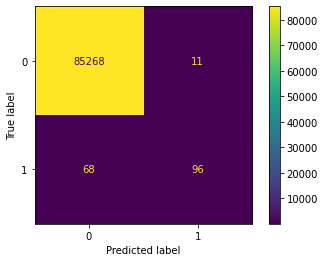

In [22]:
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm).plot()

#### Observation:
Confusion matrix has less false positives but more false negatives.

The precision is decent but recall values are low.

This could be due to imbalnced dataset. I don't think even after hyper-parameter tuning we will get any great recall value.

In this use case, it is better to have lower false positives and very low (ideally 0) false negatives.
This is because we do not want to miss any fraudulent case, but are okay to some extent if a valid transaction is flagged as fraud, as some more steps can be done to verify if the transaction is valid or fraud.

In [24]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85279
           1       0.96      0.79      0.87       164

    accuracy                           1.00     85443
   macro avg       0.98      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443



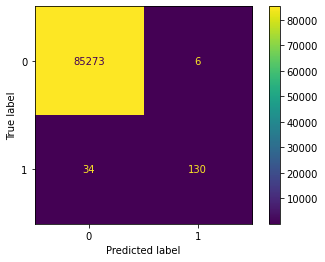

In [25]:
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm).plot()

In [26]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85279
           1       0.97      0.76      0.85       164

    accuracy                           1.00     85443
   macro avg       0.98      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443



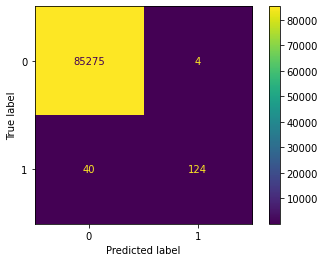

In [27]:
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm).plot()

In [30]:
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85279
           1       0.89      0.77      0.83       164

    accuracy                           1.00     85443
   macro avg       0.95      0.88      0.91     85443
weighted avg       1.00      1.00      1.00     85443



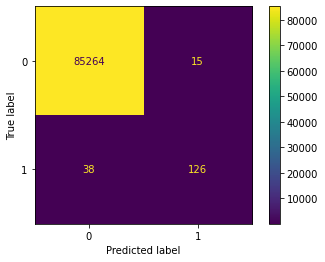

In [31]:
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm).plot()

#### Ensemble techniques are known to work well for imbalanced dataset
Lets explore with RandomForest

In [32]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85279
           1       0.94      0.80      0.86       164

    accuracy                           1.00     85443
   macro avg       0.97      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443



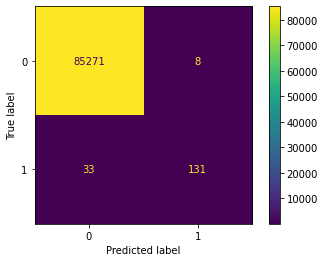

In [33]:
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm).plot()

#### Observation:
Confusion matrix has less false positives and less false negatives.

The precision and recall values are pretty decent.

This is a good baseline.

### Try imbalance mitigation techniques

#### Under Sampling

In [34]:
from collections import Counter
from imblearn.under_sampling import NearMiss

In [35]:
us = NearMiss(sampling_strategy=0.8) # values closer to 1 lead to perfectly balanced dataset
#0.8 x Majority_class_after_sampling = Minority_class_before_sampling

X_train_us, y_train_us = us.fit_resample(X_train, y_train)
print("Class distribution before:",Counter(y_train))
print("Class distribution after:",Counter(y_train_us))

Class distribution before: Counter({0: 199036, 1: 328})
Class distribution after: Counter({0: 410, 1: 328})


In [36]:
log = LogisticRegression()
log.fit(X_train_us, y_train_us)
y_pred = log.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85279
           1       0.10      0.85      0.19       164

    accuracy                           0.99     85443
   macro avg       0.55      0.92      0.59     85443
weighted avg       1.00      0.99      0.99     85443



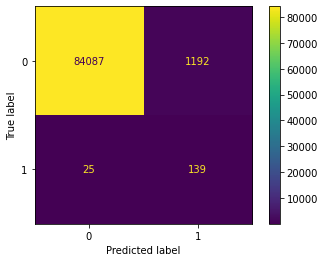

In [37]:
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm).plot()


#### Observation:
Confusion matrix has very less false negatives but a lot more false positives.

The precision is 0 for fraud case, due to too many false positives but recall value for fraud case is good as there are very less false negatives.

This result is not useful either because of too many false positives.

In [38]:
mlp = MLPClassifier()
mlp.fit(X_train_us, y_train_us)
y_pred = mlp.predict(X_test)

C:\Users\Padmakar\anaconda3\envs\ML_projects\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      0.33      0.50     85279
           1       0.00      0.95      0.01       164

    accuracy                           0.33     85443
   macro avg       0.50      0.64      0.25     85443
weighted avg       1.00      0.33      0.50     85443



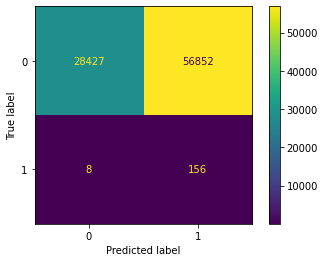

In [39]:
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm).plot()

#### Ensemble techniques are known to work well for imbalanced dataset
Lets explore with RandomForest

In [40]:
rfc = RandomForestClassifier()
rfc.fit(X_train_us, y_train_us)
y_pred = rfc.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      0.11      0.20     85279
           1       0.00      0.98      0.00       164

    accuracy                           0.11     85443
   macro avg       0.50      0.54      0.10     85443
weighted avg       1.00      0.11      0.20     85443



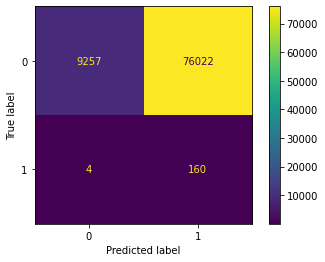

In [41]:
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm).plot()

In [56]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_us, y_train_us)
y_pred = knn.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      0.43      0.60     85279
           1       0.00      0.94      0.01       164

    accuracy                           0.43     85443
   macro avg       0.50      0.69      0.30     85443
weighted avg       1.00      0.43      0.60     85443



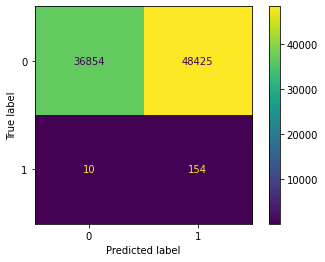

In [57]:
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm).plot()

#### Observation:
Confusion matrix has very less false negatives but a lot more false positives.


Infact RandomForest performed very bad compared to LogisticRegression now.

The precision is 0 for fraud cases due to too many false positives but recall value for fraud case is good as there are very less false negatives.

This result is not useful.

#### Undersampling is not very helpful
This is possible because my train data after undersampling is very low as compared to my test data.

The model has learnt the data seen in training set very well, but not on test data. Hence it is overfitting.

#### Over Sampling

In [42]:
from imblearn.over_sampling import RandomOverSampler

In [43]:
os = RandomOverSampler(sampling_strategy=0.8) # values closer to 1 lead to perfectly balanced dataset
# Minority_class_after_sampling = 0.8 x Majority_class_before_sampling

X_train_os, y_train_os = os.fit_resample(X_train, y_train)
print("Class distribution before:",Counter(y_train))
print("Class distribution after:",Counter(y_train_os))

Class distribution before: Counter({0: 199036, 1: 328})
Class distribution after: Counter({0: 199036, 1: 159228})


In [44]:
log = LogisticRegression()
log.fit(X_train_os, y_train_os)
y_pred = log.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85279
           1       0.08      0.88      0.15       164

    accuracy                           0.98     85443
   macro avg       0.54      0.93      0.57     85443
weighted avg       1.00      0.98      0.99     85443



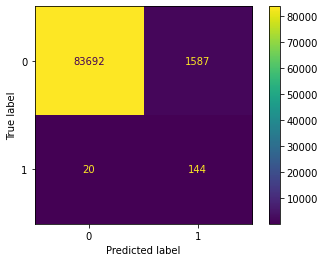

In [45]:
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm).plot()


#### Observation:
Confusion matrix has less false negatives but a more false positives.

The precision is low for fraud case, due to higher false positives but recall value for fraud case is good as there are very less false negatives.

This result is not useful either because of too many false positives.

In [46]:
mlp = MLPClassifier()
mlp.fit(X_train_os, y_train_os)
y_pred = mlp.predict(X_test)

C:\Users\Padmakar\anaconda3\envs\ML_projects\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85279
           1       0.12      0.86      0.21       164

    accuracy                           0.99     85443
   macro avg       0.56      0.92      0.60     85443
weighted avg       1.00      0.99      0.99     85443



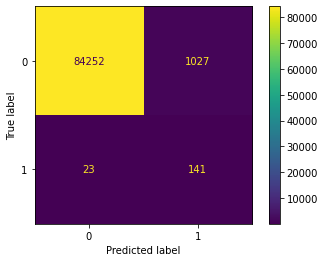

In [47]:
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm).plot()

In [58]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_os, y_train_os)
y_pred = knn.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85279
           1       0.61      0.80      0.69       164

    accuracy                           1.00     85443
   macro avg       0.80      0.90      0.85     85443
weighted avg       1.00      1.00      1.00     85443



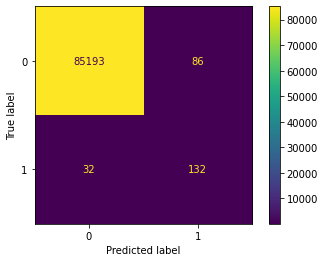

In [59]:
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm).plot()

#### Ensemble techniques are known to work well for imbalanced dataset
Lets explore with RandomForest

In [48]:
rfc = RandomForestClassifier()
rfc.fit(X_train_os, y_train_os)
y_pred = rfc.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85279
           1       0.92      0.80      0.86       164

    accuracy                           1.00     85443
   macro avg       0.96      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443



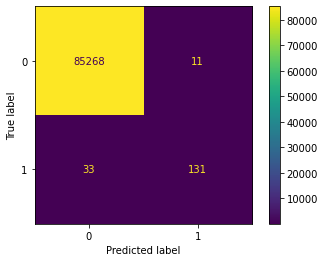

In [49]:
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm).plot()

#### Observation:
Confusion matrix has less false negatives and less false positives.


RandomForest performed similar to that of baseline.
This result might improve with some hyper-parameter tuning.

#### Oversampling is helpful
This is possible because my train data after oversampling has good balance of the class without reducing the size of the data.

The model has learnt the data seen in training set very well, and able to perfrom decently on test data.

#### Use SMOTE technique
This is different from OverSampling in the sense that it creates new synthetic data points based on neighborhood around the minority class points. OverSampling just creates copies of the minority class points.

In [50]:
from imblearn.combine import SMOTETomek

In [51]:
smote = SMOTETomek(sampling_strategy=0.8) # values closer to 1 lead to perfectly balanced dataset
# Minority_class_after_sampling = 0.8 x Majority_class_before_sampling

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("Class distribution before:",Counter(y_train))
print("Class distribution after:",Counter(y_train_smote))

Class distribution before: Counter({0: 199036, 1: 328})
Class distribution after: Counter({0: 199030, 1: 159222})


In [52]:
mlp = MLPClassifier()
mlp.fit(X_train_smote, y_train_smote)
y_pred = mlp.predict(X_test)

C:\Users\Padmakar\anaconda3\envs\ML_projects\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85279
           1       0.10      0.80      0.18       164

    accuracy                           0.99     85443
   macro avg       0.55      0.90      0.59     85443
weighted avg       1.00      0.99      0.99     85443



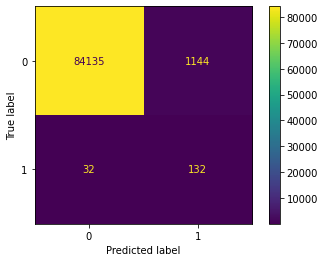

In [53]:
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm).plot()

In [60]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_smote, y_train_smote)
y_pred = knn.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85279
           1       0.13      0.83      0.22       164

    accuracy                           0.99     85443
   macro avg       0.56      0.91      0.61     85443
weighted avg       1.00      0.99      0.99     85443



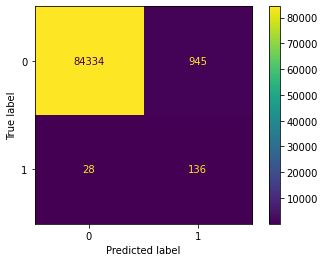

In [61]:
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm).plot()

In [54]:
rfc = RandomForestClassifier()
rfc.fit(X_train_smote, y_train_smote)
y_pred = rfc.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85279
           1       0.37      0.82      0.51       164

    accuracy                           1.00     85443
   macro avg       0.68      0.91      0.75     85443
weighted avg       1.00      1.00      1.00     85443



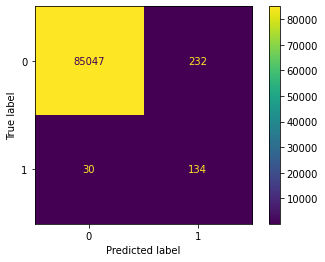

In [55]:
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm).plot()

#### Observation:
Confusion matrix has reduced false negatives but increased false positives.


RandomForest performed similar to that of baseline.
This result might improve with some hyper-parameter tuning.

#### SMOTE behaved similar to Oversampling